In [ ]:
# Import all the libraries that we might need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [ ]:
# Import all CSVs

url = 'https://drive.google.com/file/d/1eSeZ_Oh6O5qpXTp3WqGZ8jFbnB38QS15/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders
url = 'https://drive.google.com/file/d/1dbig9u1cbP1-a5g-UbxvZ6CTQMrta49A/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1VWENy2a29DKawoB00CBLiDBt--N_md_V/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1SKipVRVELcj6T-JTxiE407cTuNbc7Vnq/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

In [ ]:
# clean null values
# Filter all rows with null price (587 in total)
products = (
  products
  #.dropna() # this drops rows having null in any column, but I only want to consider the price one:
  .query('price.isnull() == False', engine='python')
  .rename(columns={"price": "stock_price", "type": "product_type"})
  .reset_index()
)


orderlines = (
  orderlines
  .query('total_price.isnull() == False', engine='python')
  .reset_index()
)

In [ ]:
# Assign categories to all products

products_c = products
products_c['category'] = 'misc'
products.loc[products['name'].str.contains('SSD|Disk|HDD|SCSI|DIMM|RAM|RAID|Memory|NAS|Rack|Drive', na=False, case=False), 'category'] = 'memory'
products.loc[products['name'].str.contains('Woofer|Headphone|Sound|Speaker|Airpod|Headset|iPod|Music|Audio|Multimedia|MIDI', na=False, case=False), 'category'] = 'sound'
products.loc[products['name'].str.contains('iMac|TB|Monitor|TV|Keyboard|USB|Mouse|Display|Server|Network|Camera|Game|Stream|Gaming|Cable', na=False, case=False), 'category'] = 'desktop'
products.loc[products['name'].str.contains('MacBook|Laptop|Portable|Bluetooth', na=False, case=False), 'category'] = 'laptop'
products.loc[products['name'].str.contains('iPad|Tablet|Wacom', na=False, case=False), 'category'] = 'tablet'
products.loc[products['name'].str.contains('Phone|Case|Charger|Watch', na=False, case=False), 'category'] = 'phone'

products_c.head()

,index,sku,name,desc,stock_price,product_type,max_price_orderlines,category
0,0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN,misc
1,1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN,desktop
2,2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,NaN,desktop
3,3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,NaN,phone
4,4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1364,NaN,memory


In [ ]:
products_c['price_range'] = np.where(products_c['stock_price'] <= 500, 'cheap', 'expensive')
products_c

,index,sku,name,desc,stock_price,product_type,max_price_orderlines,category,price_range
0,0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN,misc,cheap
1,1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN,desktop,cheap
2,2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,NaN,desktop,cheap
3,3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,NaN,phone,cheap
4,4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1364,NaN,memory,cheap
...,...,...,...,...,...,...,...,...,...
9987,10574,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horizontally for Apple Watch,29.99,12282,NaN,phone,cheap
9988,10575,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartments MacBook up to 13 inches up to 10 inches Cases,69.95,1392,NaN,laptop,cheap
9989,10576,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartments MacBook up to 13 inches up to 10 inches Cases,69.95,1392,NaN,laptop,cheap
9990,10577,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartments MacBook up to 13 inches up to 10 inches Cases,69.95,1392,NaN,laptop,cheap


In [ ]:
# Prepare our data

# if we use left join, we will have some  stock_price = NaN
orderlines_prep = orderlines.merge(products_c, on='sku', how='inner') #.dropna()
#orderlines_prep.info()

orderlines_prep = orderlines_prep.assign(
    date = pd.to_datetime(orderlines_prep["date"])
)

orderlines_prep = (
    orderlines_prep
    .rename(columns={"product_quantity": "qty", "unit_price": "sold_price", "id_order": "order_id"})
    .loc[:,["order_id", "sku", "stock_price", "sold_price", "qty", "total_price", "date", "category", "price_range"]]
    .assign(
        year = orderlines_prep['date'].dt.strftime('%Y'), 
        month = orderlines_prep['date'].dt.strftime('%m'),
        year_month = orderlines_prep['date'].dt.strftime('%Y''-''%m')
    )
    .astype({"sku": "string",  "year": "int", "month": "int", "category": "string", "price_range": "string"})
)
orderlines_prep.year_month = pd.to_datetime(orderlines_prep.year_month)

orderlines_prep.isna().any()
orderlines_prep.info()

# orderlines_prep.loc[:,["stock_price", "sold_price", "year", "month"]] #.boxplot()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285001 entries, 0 to 285000
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     285001 non-null  int64         
 1   sku          285001 non-null  string        
 2   stock_price  285001 non-null  float64       
 3   sold_price   285001 non-null  float64       
 4   qty          285001 non-null  int64         
 5   total_price  285001 non-null  float64       
 6   date         285001 non-null  datetime64[ns]
 7   category     285001 non-null  string        
 8   price_range  285001 non-null  string        
 9   year         285001 non-null  int64         
 10  month        285001 non-null  int64         
 11  year_month   285001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(4), string(3)
memory usage: 28.3 MB


In [ ]:
orderlines_prep = (
    orderlines_prep
      .assign(discount =  (orderlines_prep['stock_price'] - orderlines_prep['sold_price']))
      .query('sold_price > 0') # remove refunds (sold_price is negative)
)

orderlines_prep = (
    orderlines_prep
      .assign(discount_percent = (((orderlines_prep['discount'] * 100) / orderlines_prep['stock_price'])))      
)

orderlines_prep = (
    orderlines_prep
      .loc[(orderlines_prep['discount_percent'] >= 0) & (orderlines_prep['discount_percent'] <= 100)]    # x3 rows have a value of -112% discount
      .reset_index()
)


orderlines_prep.head()

,index,order_id,sku,stock_price,sold_price,qty,total_price,date,category,price_range,year,month,year_month,discount,discount_percent
0,0,299539,OTT0133,34.99,18.99,1,18.99,2017-01-01 00:07:19,phone,cheap,2017,1,2017-01-01,16.0,45.727351
1,1,299603,OTT0133,34.99,18.99,1,18.99,2017-01-01 10:18:53,phone,cheap,2017,1,2017-01-01,16.0,45.727351
2,2,300713,OTT0133,34.99,19.99,1,19.99,2017-01-02 16:51:26,phone,cheap,2017,1,2017-01-01,15.0,42.869391
3,3,301432,OTT0133,34.99,19.99,1,19.99,2017-01-03 11:21:52,phone,cheap,2017,1,2017-01-01,15.0,42.869391
4,4,302307,OTT0133,34.99,19.99,1,19.99,2017-01-04 10:11:45,phone,cheap,2017,1,2017-01-01,15.0,42.869391


In [ ]:
#products_c.loc[products_c['category'] == 'other' and products_c['name'].str.contains('battery', case=False)].shape[0]
#p = products_c.query('category == "other"')['category'].str.contains('battery', case=False)
# products_c.loc[products['name'].str.contains('battery', na=False, case=False)].query('category == "other"')
# products_c.query('category == "other"').shape[0]
#products_c.query('category == "other"').sample(20)

In [ ]:
products_c

,index,sku,name,desc,stock_price,product_type,max_price_orderlines,category,price_range
0,0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN,misc,cheap
1,1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN,desktop,cheap
2,2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,NaN,desktop,cheap
3,3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,NaN,phone,cheap
4,4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1364,NaN,memory,cheap
...,...,...,...,...,...,...,...,...,...
9987,10574,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horizontally for Apple Watch,29.99,12282,NaN,phone,cheap
9988,10575,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartments MacBook up to 13 inches up to 10 inches Cases,69.95,1392,NaN,laptop,cheap
9989,10576,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartments MacBook up to 13 inches up to 10 inches Cases,69.95,1392,NaN,laptop,cheap
9990,10577,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartments MacBook up to 13 inches up to 10 inches Cases,69.95,1392,NaN,laptop,cheap


In [ ]:
# How many cheap/expensive products do we have?

df =(
    products_c.groupby(['category','price_range']).agg({'stock_price':'count'}).reset_index() #.groupby('price_range')['price'].sum()
)
#df.sum() 9992  #cheap:5988, #medium:2136 #expensive:1868
#print(df)
df_trans= df.pivot(index='category', columns='price_range')['stock_price'].reset_index()
df_trans= df_trans[['category',	'cheap', 'expensive']]
df_trans

price_range,category,cheap,expensive
0,desktop,1782,1661
1,laptop,554,516
2,memory,548,158
3,misc,838,47
4,phone,2849,270
5,sound,153,6
6,tablet,428,182


price_range category  cheap  expensive
0            desktop   1782       1661
1             laptop    554        516
2             memory    548        158
3               misc    838         47
4              phone   2849        270
5              sound    153          6
6             tablet    428        182


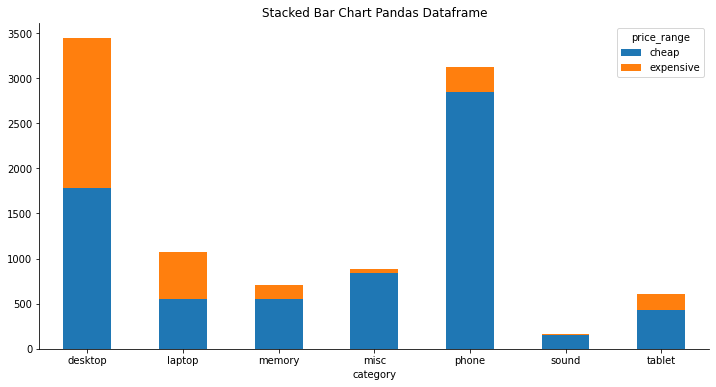

In [ ]:
df_trans.plot(x='category', kind='bar', stacked=True,
        title='Stacked Bar Chart Pandas Dataframe', 
        figsize=(12,6))

print(df_trans)

#ax = df.plot(kind='bar',stacked=True,figsize=(18,15))
#ax.tick_params(rotation=0)

plt.xticks(rotation='horizontal')
sns.despine()
plt.show()
# stacked barplot

price_range category  cheap  expensive
0            desktop   1782       1661
1             laptop    554        516
2             memory    548        158
3               misc    838         47
4              phone   2849        270
5              sound    153          6
6             tablet    428        182


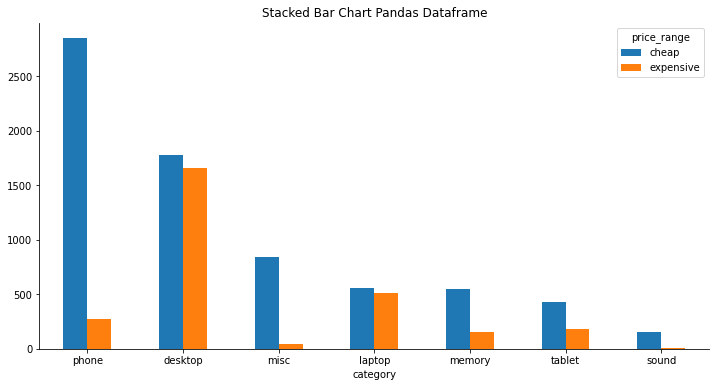

In [ ]:

df_trans.sort_values('cheap', ascending=False).plot(x='category', kind='bar', stacked=False,
        title='Stacked Bar Chart Pandas Dataframe', 
        figsize=(12,6))

print(df_trans)

#ax = df.plot(kind='bar',stacked=True,figsize=(18,15))
#ax.tick_params(rotation=0)

plt.xticks(rotation='horizontal')
sns.despine()
plt.show()

# stacked barplot

In [ ]:
#How many sales/revenue do cheap/expensive products generate?

#Revenue by cheap and expensive products
revenue_gen =(orderlines_prep.groupby(['category','price_range'])['sold_price'].sum().reset_index()) #.groupby('price_range')['price'].sum().reset_index())
revenue_gen  #cheap =395197.64 , expensive =5159740.20 


,category,price_range,sold_price
0,desktop,cheap,7383452.77
1,desktop,expensive,39472766.10
2,laptop,cheap,2815908.63
3,laptop,expensive,33242781.11
4,memory,cheap,2969255.18
5,memory,expensive,3713829.19
6,misc,cheap,1714595.77
7,misc,expensive,303872.80
8,phone,cheap,5463348.89
9,phone,expensive,9224106.19


In [ ]:
#How much revenue each category is generating?
revenue_cat =(orderlines_prep.groupby('category')['sold_price'].sum().reset_index()
          .sort_values('sold_price', ascending=False)) #.groupby('price_range')['price'].sum().reset_index())
revenue_cat  #cheap =395197.64 , expensive =5159740.20 

,category,sold_price
0,desktop,46856218.87
1,laptop,36058689.74
4,phone,14687455.08
2,memory,6683084.37
6,tablet,6549460.74
3,misc,2018468.57
5,sound,346683.19


In [ ]:
total_revenue = revenue_cat.sold_price.sum()

revenue_cat = revenue_cat.assign(
    sold_price_percent = revenue_cat['sold_price'] * 100 / total_revenue
)
revenue_cat

,category,sold_price,sold_price_percent
0,desktop,46856218.87,41.392397
1,laptop,36058689.74,31.853949
4,phone,14687455.08,12.974777
2,memory,6683084.37,5.903782
6,tablet,6549460.74,5.785740
3,misc,2018468.57,1.783098
5,sound,346683.19,0.306257


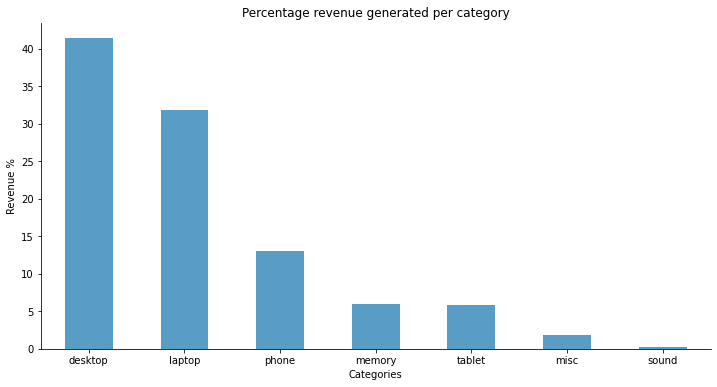

In [ ]:

revenue_cat.plot(
    x='category',
    y='sold_price_percent',
    kind='bar',
    stacked=False,
    title='Percentage revenue generated per category', 
    figsize=(12,6),
    legend=False,
    color="#599DC6"
)

plt.xticks(rotation='horizontal')
plt.ylabel("Revenue %")
plt.xlabel("Categories")
sns.despine()

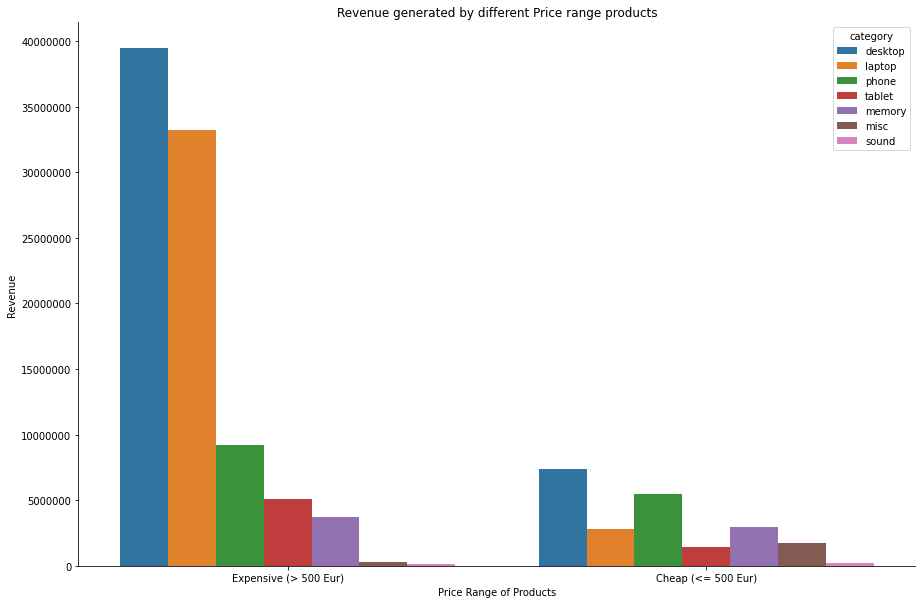

In [ ]:
# Graph for Revenue generated by different price range of products
plt.subplots(figsize=(15, 10))

ax = sns.barplot(data=revenue_gen.sort_values(['price_range', 'sold_price'], ascending=[False, False]), x='price_range', y='sold_price', hue = 'category')

#plt.ylim(100, 15500000)
plt.xlabel('Price Range of Products')
plt.ylabel('Revenue')
plt.title('Revenue generated by different Price range products')
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(['Expensive (> 500 Eur)', 'Cheap (<= 500 Eur)'])

sns.despine()
plt.show()

In [ ]:
df_discount =(orders.loc[orders['state'] == 'Completed']
       .merge(orderlines_prep, how="inner")
)
df_discount

,order_id,created_date,total_paid,state,check_orders,index,sku,stock_price,sold_price,qty,total_price,date,category,price_range,year,month,year_month,discount,discount_percent
0,241423,2017-11-06 13:10:02,136.15,Completed,True,82777,LAC0212,139.99,129.16,1,129.16,2017-11-06 12:47:20,desktop,cheap,2017,11,2017-11-01,10.83,7.736267
1,242832,2017-12-31 17:40:03,15.76,Completed,True,30957,PAR0074,17.99,10.77,1,10.77,2017-12-31 17:26:40,misc,cheap,2017,12,2017-12-01,7.22,40.133407
2,243330,2017-02-16 10:59:38,84.98,Completed,True,127142,OWC0074,99.99,77.99,1,77.99,2017-02-15 17:07:44,memory,cheap,2017,2,2017-02-01,22.00,22.002200
3,245275,2017-06-28 11:35:37,149.00,Completed,True,233943,TAD0007,179.00,149.00,1,149.00,2017-06-28 11:12:30,misc,cheap,2017,6,2017-06-01,30.00,16.759777
4,245595,2017-01-21 12:52:47,112.97,Completed,True,121742,PAC1561,103.95,52.99,2,105.98,2017-01-21 12:49:00,desktop,cheap,2017,1,2017-01-01,50.96,49.023569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58690,527042,2018-03-14 11:47:50,18.98,Completed,True,12201,APP0927,35.00,13.99,1,13.99,2018-03-14 11:42:38,phone,cheap,2018,3,2018-03-01,21.01,60.028571
58691,527070,2018-03-14 11:50:48,24.97,Completed,True,13997,APP0698,25.00,9.99,2,19.98,2018-03-14 11:49:01,desktop,cheap,2018,3,2018-03-01,15.01,60.040000
58692,527074,2018-03-14 11:51:42,24.97,Completed,True,14000,APP0698,25.00,9.99,2,19.98,2018-03-14 11:49:36,desktop,cheap,2018,3,2018-03-01,15.01,60.040000
58693,527096,2018-03-14 11:58:40,34.96,Completed,True,14008,APP0698,25.00,9.99,3,29.97,2018-03-14 11:54:35,desktop,cheap,2018,3,2018-03-01,15.01,60.040000


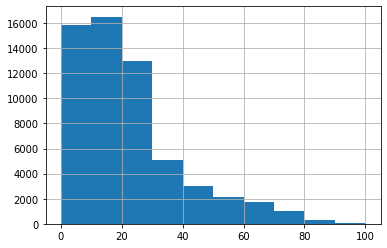

In [ ]:
#How big are the discounts by category?

df_discount.discount_percent.hist()

In [ ]:
#how big are the discounts by category?

df_discount =(df_discount
             .loc[(df_discount['discount_percent'] >= 0) & (df_discount['discount_percent'] <= 100)]    # x3 rows have a value of -112% discount
              .reset_index()
)
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58695 entries, 0 to 58694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           58695 non-null  int64         
 1   order_id          58695 non-null  int64         
 2   created_date      58695 non-null  object        
 3   total_paid        58695 non-null  float64       
 4   state             58695 non-null  object        
 5   check_orders      58695 non-null  bool          
 6   index             58695 non-null  int64         
 7   sku               58695 non-null  string        
 8   stock_price       58695 non-null  float64       
 9   sold_price        58695 non-null  float64       
 10  qty               58695 non-null  int64         
 11  total_price       58695 non-null  float64       
 12  date              58695 non-null  datetime64[ns]
 13  category          58695 non-null  string        
 14  price_range       5869

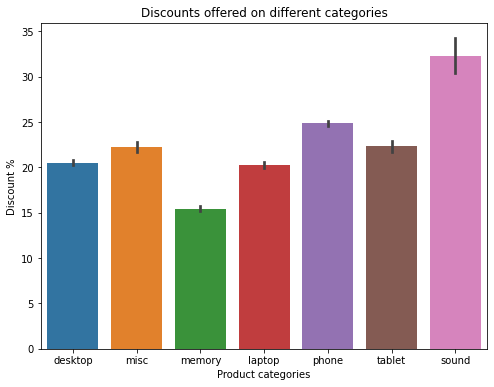

In [ ]:
#Graph for how big are the discounts by category?
plt.subplots(figsize=(8, 6))

sns.barplot(data=df_discount, x='category', y='discount_percent')

plt.xlabel('Product categories')
plt.ylabel('Discount %')
plt.title('Discounts offered on different categories')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
# How many products are being discounted?

orderlines_prep.loc[orderlines_prep['discount_percent'] > 0].sku.nunique() # 7267
#orderlines_prep.loc[orderlines_prep['discount_percent'] > 0].sold_price.sum() # 110642328.95
orderlines_prep.loc[orderlines_prep['discount_percent'] > 0].stock_price.sum() # 125494350.55999999



125494350.55999999

Text(0, 0.5, 'Product price & discount evolution')

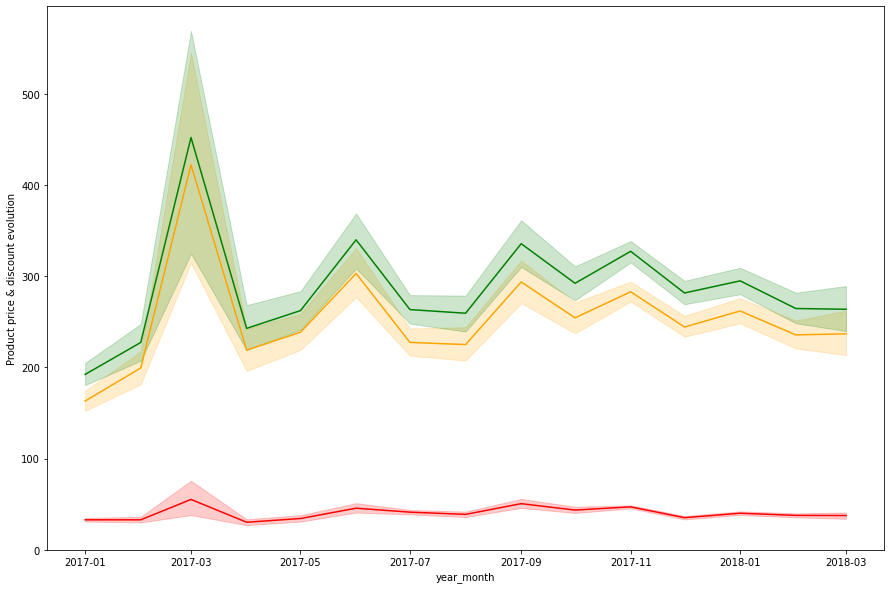

In [ ]:
# How big are the offered discounts as a percentage of the product prices?

plt.subplots(figsize=(15, 10))
df = df_discount

ax = sns.lineplot (data = df.query('discount > 0'), x='year_month', y='sold_price', color='orange')
ax = sns.lineplot (data = df, x='year_month', y='stock_price', color='green')
ax = sns.lineplot (data = df, x='year_month', y='discount', color='red')
#ax = sns.lineplot (data = df.query('discount == 0'), x='year_month', y='sold_price', color='blue')

plt.ylabel('Product price & discount evolution')

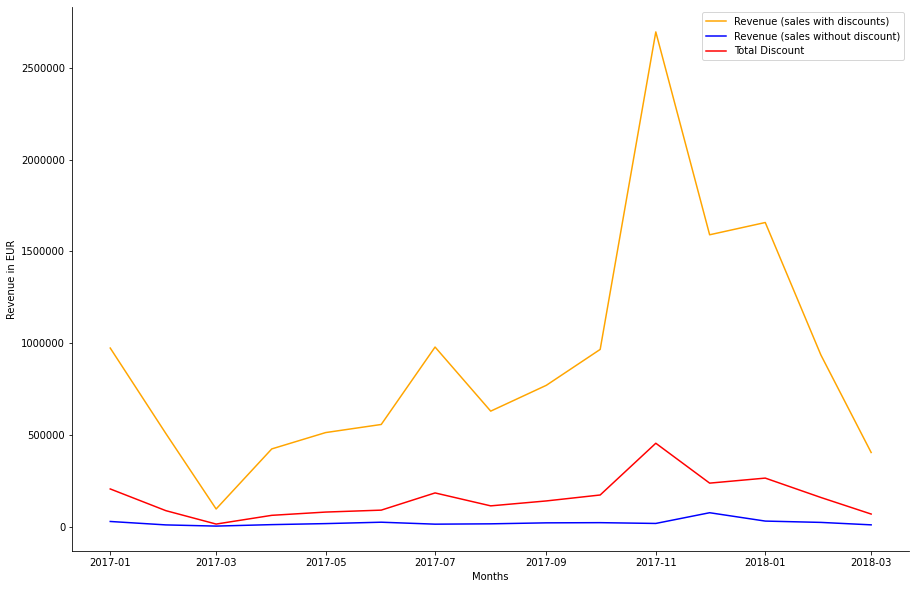

In [ ]:
#How seasonality and special dates (Christmas, Black Friday) affect sales?

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

plt.subplots(figsize=(15, 10))
df_with_discounts = df_discount.query('discount > 0')
df_without_discounts = df_discount.query('discount <= 0')

df = df_with_discounts.groupby('year_month').agg({'sold_price':'sum'})
df2 = df_with_discounts.groupby('year_month').agg({'stock_price':'sum'})
df3 = df_with_discounts.groupby('year_month').agg({'discount':'sum'})


df_nd = df_without_discounts.groupby('year_month').agg({'sold_price':'sum'})

ax = sns.lineplot(data = df, x='year_month', y='sold_price', color='orange')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax = sns.lineplot(data = df_nd, x='year_month', y='sold_price', color='blue')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#ax = sns.lineplot(data = df2, x='year_month', y='stock_price', color='green')
ax = sns.lineplot(data = df3, x='year_month', y='discount', color='red')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

sns.despine()

# plt.ylim(0, 1000)

plt.ylabel('Revenue in EUR')
plt.xlabel('Months')
plt.legend(['Revenue (sales with discounts)', 'Revenue (sales without discount)', 'Total Discount'])



Text(0.5, 1.0, 'Number of sales (with discounts) per category')

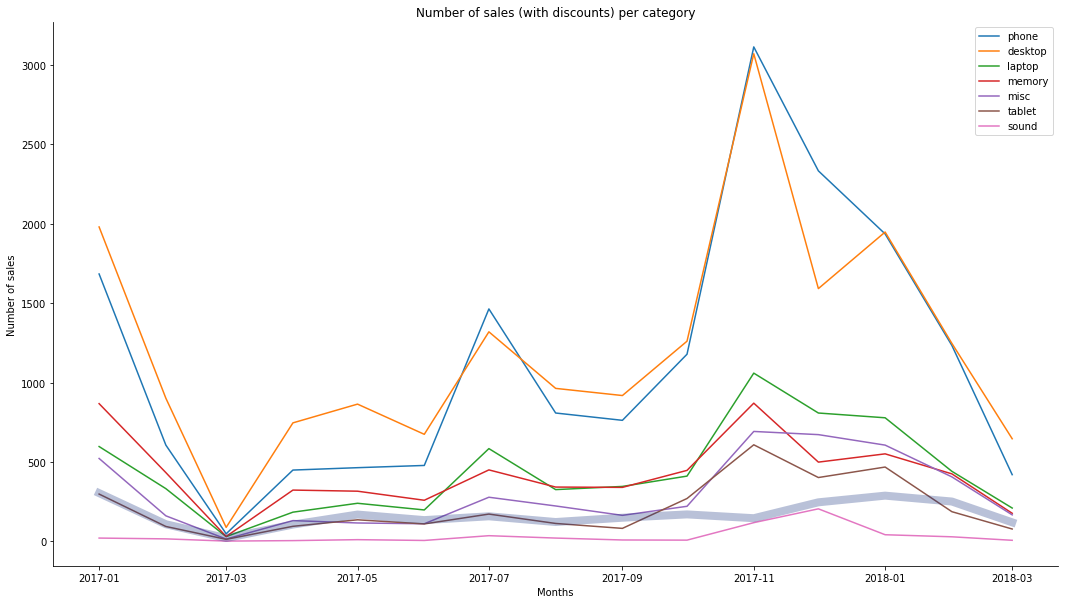

In [ ]:
# Revenue per category and month


plt.subplots(figsize=(18, 10))
df = (df_discount.query('discount > 0').groupby(['category', 'year_month'])['sold_price'].count().reset_index()
          .sort_values('sold_price', ascending=False))

df_nd_count = df_without_discounts.groupby('year_month').agg({'sold_price':'count'})

ax = sns.lineplot(data = df, x='year_month', y='sold_price', hue='category')
ax = sns.lineplot(data = df_nd_count, x='year_month', y='sold_price', linewidth=8, color=(0.1, 0.2, 0.5, 0.3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

sns.despine()

# plt.ylim(0, 1000)

plt.ylabel('Number of sales')
plt.xlabel('Months')
plt.title("Number of sales (with discounts) per category")

Text(0.5, 0, 'Months')

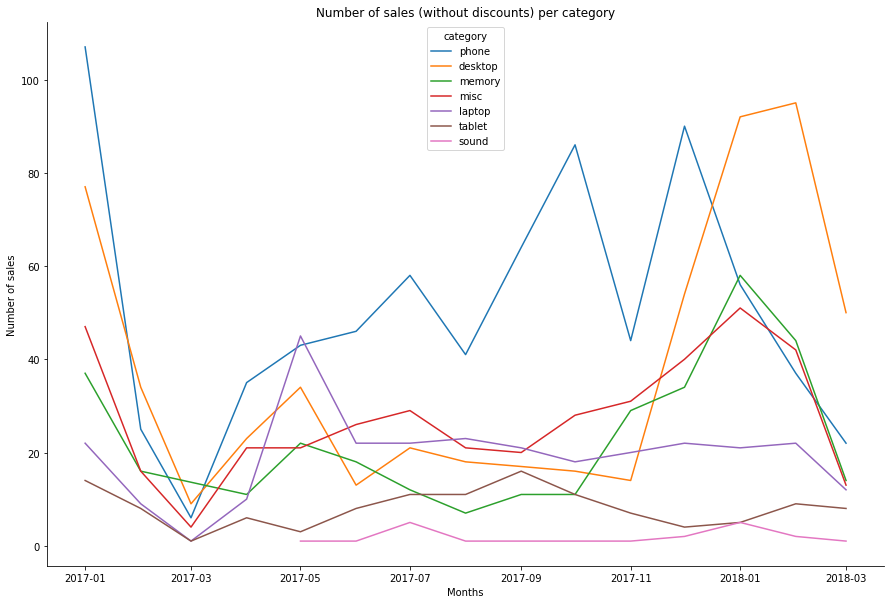

In [ ]:
# Revenue per category and month


plt.subplots(figsize=(15, 10))
df = (df_discount.query('discount == 0').groupby(['category', 'year_month'])['sold_price'].count().reset_index()
          .sort_values('sold_price', ascending=False))
df 

ax = sns.lineplot(data = df, x='year_month', y='sold_price', hue='category')

sns.despine()

# plt.ylim(0, 1000)

plt.title("Number of sales (without discounts) per category")
plt.ylabel('Number of sales')
plt.xlabel('Months')

In [ ]:
df_with_discounts.loc[df_with_discounts['year_month'] >= '2017-04'].groupby('year_month').agg({'sold_price':'sum'}).sold_price.mean()

1010248.8466666667

Text(0.5, 0, 'Months')

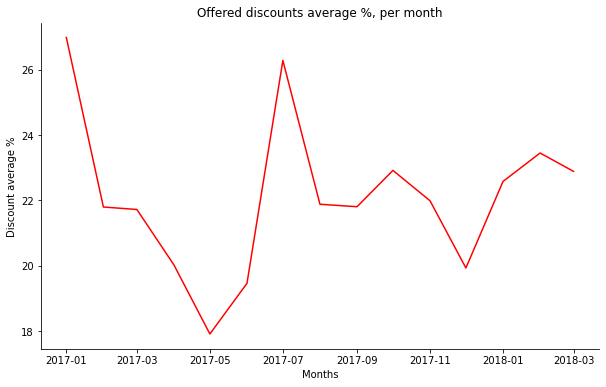

In [ ]:

plt.subplots(figsize=(10,6))
sns.despine()
plt.title("Offered discounts average %, per month")
df4 = df_with_discounts.groupby('year_month').agg({'discount_percent':'mean'})
ax = sns.lineplot(data = df4, x='year_month', y='discount_percent', color='red')
plt.ylabel('Discount average %')
plt.xlabel('Months')

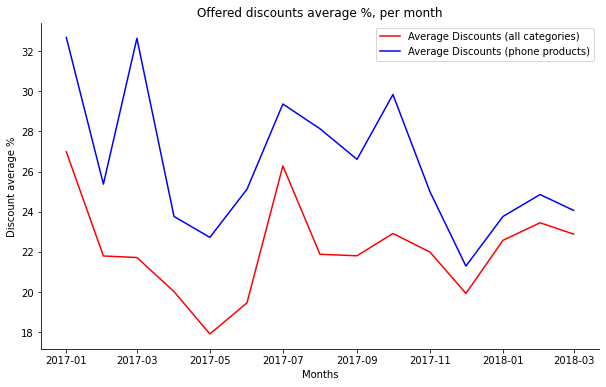

In [ ]:

plt.subplots(figsize=(10,6))
sns.despine()
plt.title("Offered discounts average %, per month")
df4 = df_with_discounts.groupby('year_month').agg({'discount_percent':'mean'})
df5 = df_with_discounts.groupby(['year_month', 'category']).agg({'discount_percent':'mean'}).reset_index()
ax = sns.lineplot(data = df4, x='year_month', y='discount_percent', color='red')
ax = sns.lineplot(data = df5.loc[df5['category'] == 'phone'], x='year_month', y='discount_percent', color='blue')
plt.ylabel('Discount average %')
plt.xlabel('Months')

plt.legend(['Average Discounts (all categories)', 'Average Discounts (phone products)'])


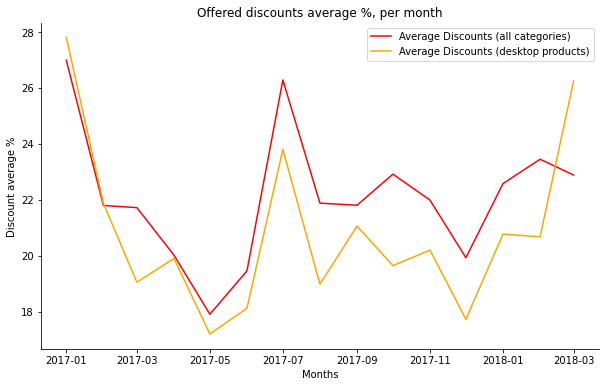

In [ ]:
plt.subplots(figsize=(10,6))
sns.despine()
plt.title("Offered discounts average %, per month")
df4 = df_with_discounts.groupby('year_month').agg({'discount_percent':'mean'})
df5 = df_with_discounts.groupby(['year_month', 'category']).agg({'discount_percent':'mean'}).reset_index()
ax = sns.lineplot(data = df4, x='year_month', y='discount_percent', color='red')
ax = sns.lineplot(data = df5.loc[df5['category'] == 'desktop'], x='year_month', y='discount_percent', color='orange')
plt.ylabel('Discount average %')
plt.xlabel('Months')

plt.legend(['Average Discounts (all categories)', 'Average Discounts (desktop products)'])

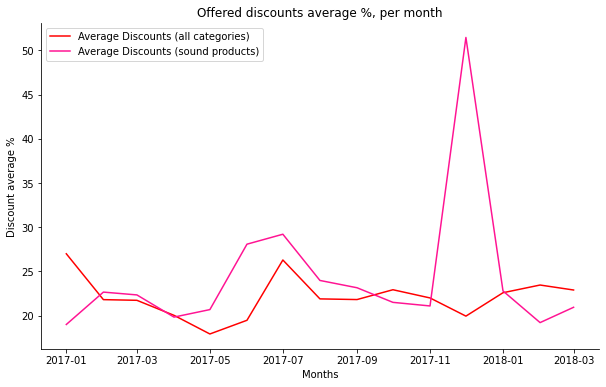

In [ ]:
plt.subplots(figsize=(10,6))
sns.despine()
plt.title("Offered discounts average %, per month")
df4 = df_with_discounts.groupby('year_month').agg({'discount_percent':'mean'})
df5 = df_with_discounts.groupby(['year_month', 'category']).agg({'discount_percent':'mean'}).reset_index()
ax = sns.lineplot(data = df4, x='year_month', y='discount_percent', color='red')
ax = sns.lineplot(data = df5.loc[df5['category'] == 'sound'], x='year_month', y='discount_percent', color='deeppink')
plt.ylabel('Discount average %')
plt.xlabel('Months')

plt.legend(['Average Discounts (all categories)', 'Average Discounts (sound products)'])

In [ ]:
df_with_discounts.loc[df_with_discounts['year_month'] == '2018-03'].shape[0]
df_with_discounts.loc[df_with_discounts['year_month'] == '2017-03'].shape[0]

227

In [ ]:
#How seasonality and special dates (Christmas, Black Friday) affect sales?

import numpy as np; np.random.seed(1)
import seaborn.apionly as sns
import matplotlib.pyplot as plt

# x = df_with_discounts['year_month']
# y = df_with_discounts['sold_price']

# fig, ax = plt.subplots()

# ax.bar(x,y, width=100, color="lightblue", zorder=0)
# sns.regplot(x=x, y=y, ax=ax)
# ax.set_ylim(0, None)
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [ ]:

# - In which months is Eniac releasing more products?
# - Are sales for a product spiking the month it gets released?

products.sort_values('max_price_orderlines', ascending=False)
# products.type.nunique()
orderlines

,index,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True
...,...,...,...,...,...,...,...,...,...,...
293738,293738,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True
293739,293739,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True
293740,293740,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True
293741,293741,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True
